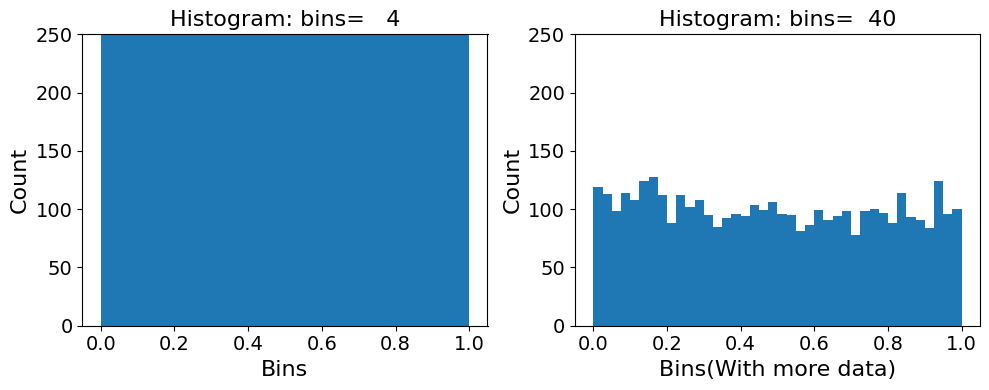

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(4000,1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
n1bins, n2bins = 4,40
ax[0].hist(x, bins=n1bins)
ax[0].set_ylim(0,250)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)

ax[1].hist(x, bins=n2bins)
ax[1].set_ylim(0,250)
ax[1].set_xlabel("Bins(With more data)", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)

plt.savefig("histograms_uniform.png")
plt.tight_layout()

Here we expected an uniform distribution Here we used 1000 random data values between 0 and 1 and two set of bins as 4 and 40.When we consider Flatness of the two histograms we got after compilation more fluctuation was shown by the histogram with 40 bins. This is because when the number of bins increases by keeping the number of data values constant, the probability of values that is fit into bins fluctuate rapidly. When the number of bins increase the intervals of each bin become narrower. This decreased bin width cause for a spiky appearance in the histogram.

When the number of data values increase, the flatness of the histogram will be increase, resembling it closely to a uniform distribution

The slight change of the histogram happen because when the numpy.random.rand() execution makes new random data sets each time

(array([  4.,   4.,  13.,  24.,  38.,  60.,  87.,  94., 123., 129., 123.,
        109.,  83.,  47.,  34.,  17.,   6.,   2.,   2.,   1.]),
 array([-740.02670293, -660.53966976, -581.05263659, -501.56560342,
        -422.07857025, -342.59153708, -263.10450391, -183.61747074,
        -104.13043757,  -24.6434044 ,   54.84362877,  134.33066194,
         213.81769511,  293.30472828,  372.79176145,  452.27879461,
         531.76582778,  611.25286095,  690.73989412,  770.22692729,
         849.71396046]),
 <BarContainer object of 20 artists>)

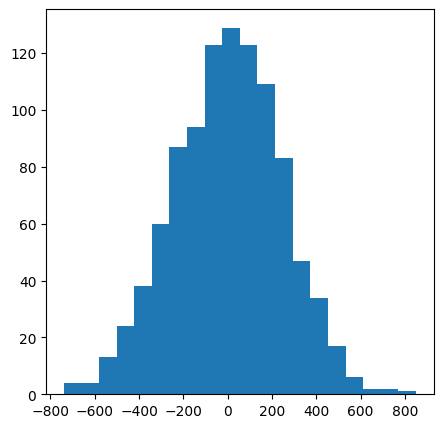

In [2]:
N = 1000
x1 = np.zeros(N)
for n in range(N):
  x1[n] = np.sum(np.random.rand(350000,1)) - np.sum(np.random.rand(350000,1))
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 20)

This resembles the normal distribution this is because when the central limit theorem

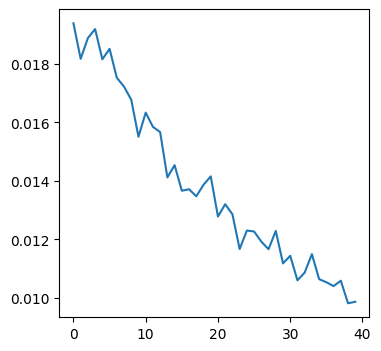

In [3]:
MaxTrial = 2000
sampleSizeRange = np.linspace(100, 200, 40)
plotVar = np.zeros(len(sampleSizeRange))
for sSize in range(len(sampleSizeRange)):
  numSamples = int(sampleSizeRange[sSize])
  vStrial = np.zeros(MaxTrial)
  for trial in range(MaxTrial):
    xx = np.random.randn(numSamples,1)
    vStrial[trial] = np.var(xx)
  plotVar[sSize] = np.var(vStrial)
fig, ax = plt.subplots(figsize=(4,4))
ax.plot((plotVar))

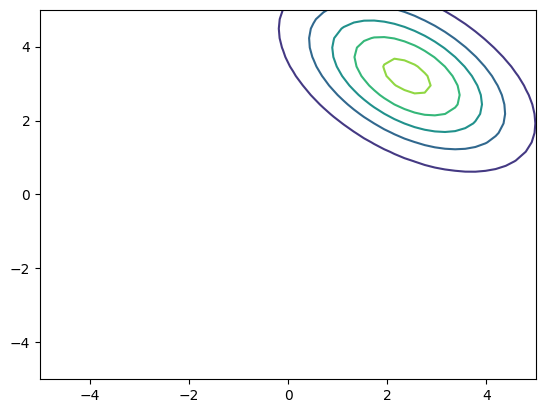

In [4]:
from ctypes import c_int32
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

# Plot contours
#
nx, ny = 50, 40
m1 = np.array([2.4,3.2])
C1 = np.array([[2,-1], [-1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)


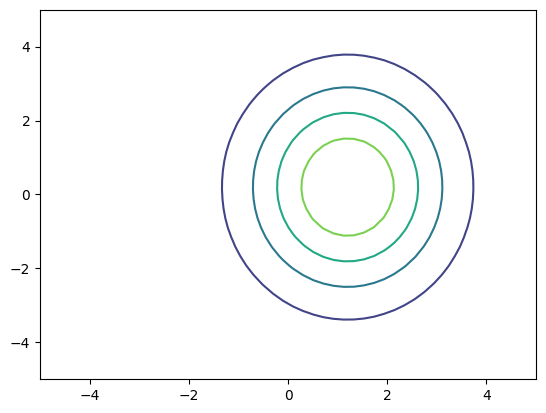

In [5]:
# Plot contours
#
nx, ny = 50, 40
m1 = np.array([1.2,0.2])
C1 = np.array([[2,0], [0,4]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

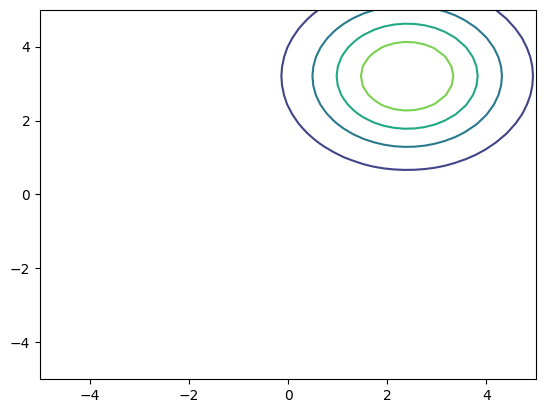

In [6]:
# Plot contours
#
nx, ny = 50, 40
m1 = np.array([2.4,3.2])
C1 = np.array([[2,0], [0,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

(-6.0, 6.0)

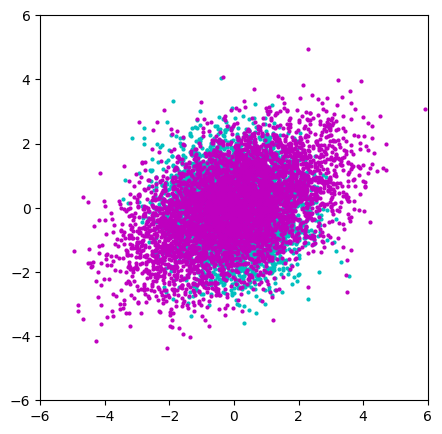

In [7]:
C = np.array([[2.0,1.0], [1.0,2]])
A = np.linalg.cholesky(C)
# print(A)
# print(A @ A.T)

X = np.random.randn(5000,2)
Y = X @ A
# print(X.shape)
# print(Y.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], c="c", s=4)
ax.scatter(Y[:,0], Y[:,1], c="m", s=4)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

The vector:  [0.8660254037844386, 0.5000000000000001]
Magnitude :  1.0
Angle :  59.99999999999999
(5000,)
Projected variance:  3.0582713494215414


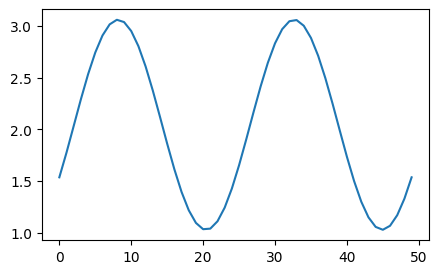

In [9]:
theta = np.pi/3
u = [np.sin(theta), np.cos(theta)]
print("The vector: ", u)
print("Magnitude : ", np.sqrt(u[0]**2 + u[1]**2))
print("Angle : ", theta*180/np.pi)

yp = Y @ u
print(yp.shape)
print("Projected variance: ", np.var(yp))

# Store projected variances in pVars & plot
#
nPoints = 50
pVars = np.zeros(nPoints)
thRange = np.linspace(0, 2*np.pi, nPoints)
for n in range(nPoints):
  theta = thRange[n]
  u = [np.sin(theta), np.cos(theta)]
  pVars[n] = np.var(Y @ u)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pVars)


In [10]:
max_value = np.max(pVars)
min_value = np.min(pVars)

print("Maxima value:", max_value)
print("Minima value:", min_value)

Maxima value: 3.0573226596899983
Minima value: 1.0308039156205675


In [11]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues: [3. 1.]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
